In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as pyplot
import seaborn as sns

In [2]:
data = pd.read_csv("bread basket.csv")
print("DataFrame shape :",data.shape)
data.head()

DataFrame shape : (20507, 5)


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [10]:
# Format yang benar untuk data Anda
data['date_time'] = pd.to_datetime(data['date_time'], format="%d-%m-%Y %H:%M")

In [11]:
data["date_time"].dtype

dtype('<M8[ns]')

In [12]:
data["month"] = data['date_time'].dt.month
data["day"] = data['date_time'].dt.weekday
data['hour'] = data['date_time'].dt.hour
data.head()

,Transaction,Item,date_time,period_day,weekday_weekend,month,day,hour
0,1,Bread,2016-10-30 09:58:00,morning,weekend,10,6,9
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,6,10
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,6,10
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,10,6,10
4,3,Jam,2016-10-30 10:07:00,morning,weekend,10,6,10


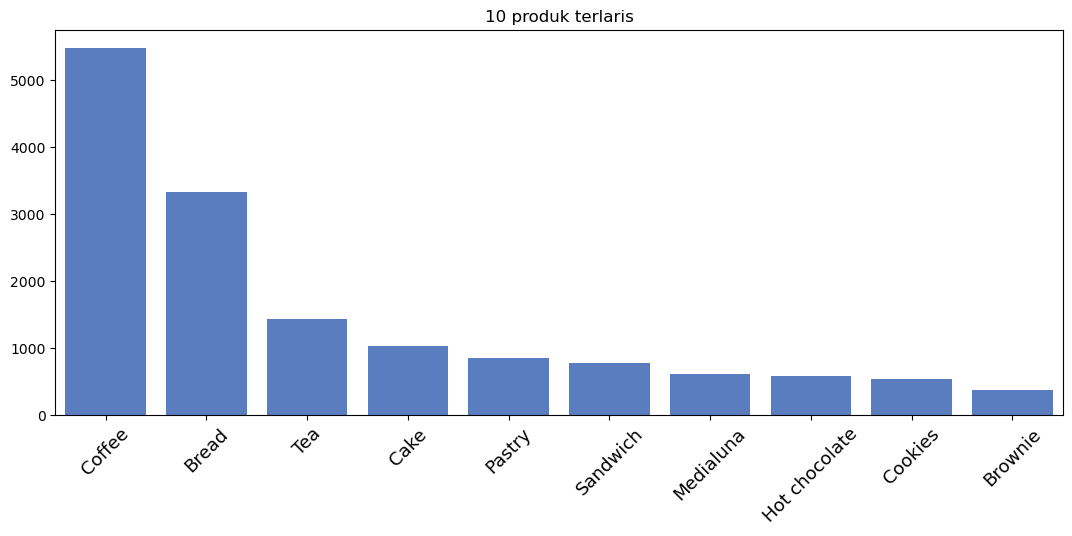

In [ ]:
#10 item paling laris

from matplotlib import pyplot as plt


plt.figure(figsize=(13,5))
sns.set_palette("muted")

sns.barplot(x = data["Item"].value_counts()[:10].index,
            y = data["Item"].value_counts()[:10].values)
plt.xlabel(""); plt.ylabel("")
plt.xticks(size = 13, rotation = 45)
plt.title('10 produk terlaris')
plt.show()


C:\Users\fauzan\AppData\Local\Temp\ipykernel_8932\771944154.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data["Item"].value_counts()[:10].index,


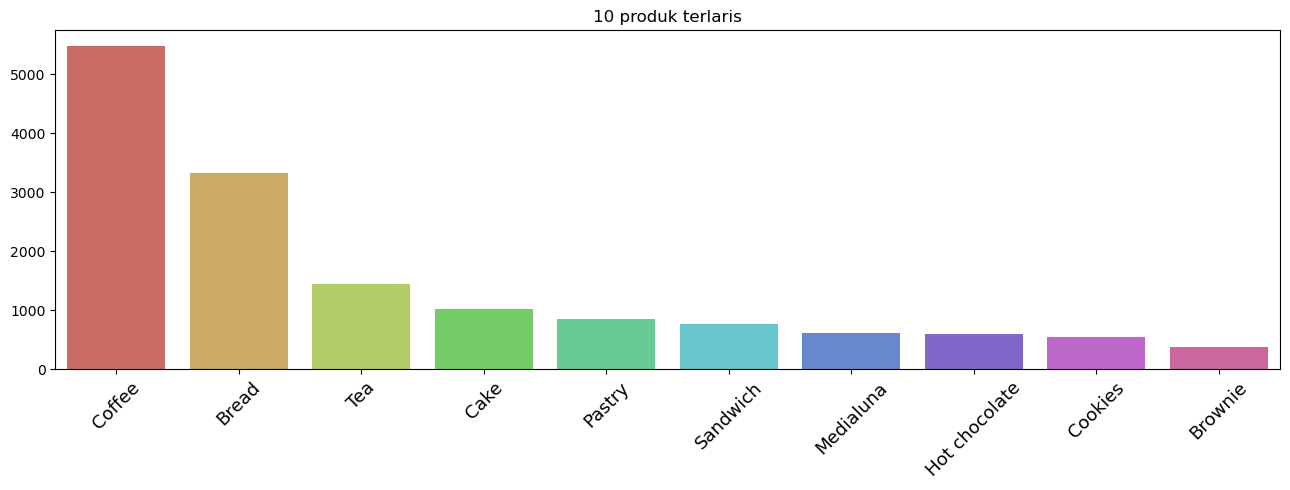

In [18]:
plt.figure(figsize=(13,5))

# Buat palette kustom dengan 10 warna berbeda
custom_palette = sns.color_palette("hls", 10)

sns.barplot(x=data["Item"].value_counts()[:10].index,
            y=data["Item"].value_counts()[:10].values,
            palette=custom_palette)

plt.xlabel(""); plt.ylabel("")
plt.xticks(size=13, rotation=45)
plt.title('10 produk terlaris')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'jumlah transaksi tiap bulan')

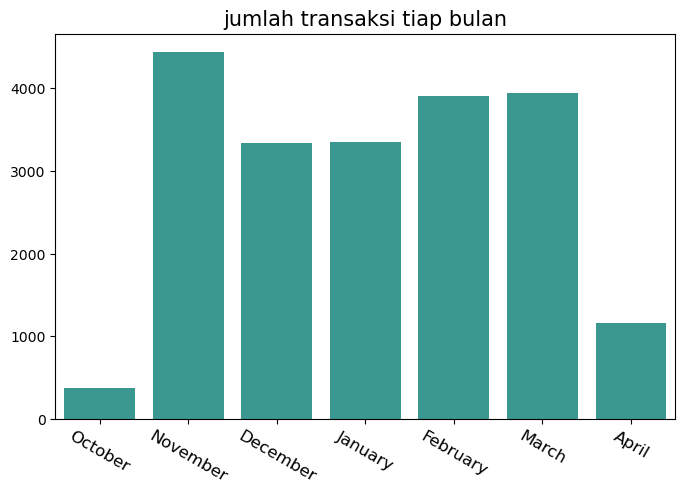

In [23]:
# transakasi per bulan

data_perbulan = data.groupby('month')['Transaction'].count()
data_perbulan = pd.concat([data_perbulan.iloc[4:], data_perbulan.iloc[:4]])

plt.figure(figsize= (8,5))
sns.barplot(
    x = ["October", "November", "December", "January", "February", "March", "April"],
    y = data_perbulan.values, color="#2AA89E")
plt.xticks(size= 12, rotation = -30)
plt.title("jumlah transaksi tiap bulan", size = 15)

Text(0.5, 1.0, 'jumlah transaksi tiap hari')

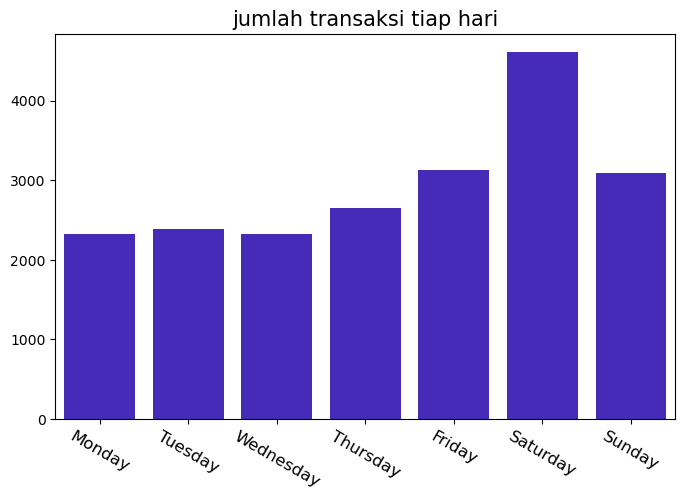

In [24]:
#transaksi per hari

data_day = data.groupby('day')['Transaction'].count()

plt.figure(figsize= (8,5))
sns.barplot(
    x = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    y = data_day.values, color="#3614CE")
plt.xticks(size= 12, rotation = -30)
plt.title("jumlah transaksi tiap hari", size = 15)

<function matplotlib.pyplot.show(close=None, block=None)>

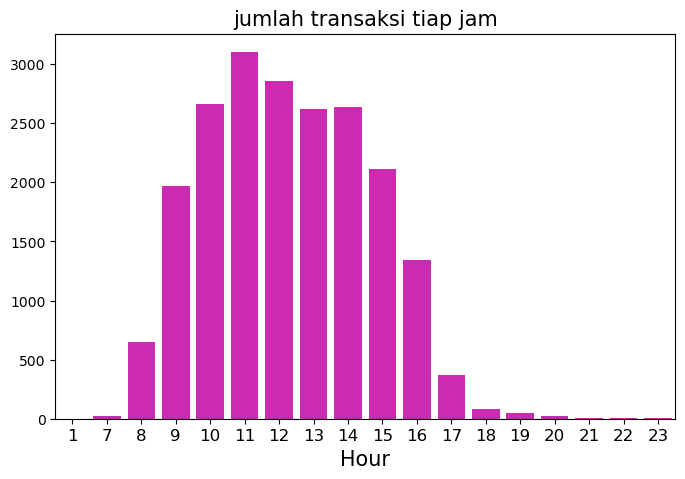

In [27]:
# pembelian perjam

data_hour = data.groupby('hour')['Transaction'].count()

plt.figure(figsize= (8,5))
sns.barplot(
    x = data_hour.index,
    y = data_hour.values, color="#E411C1")
plt.xlabel('Hour', size= 15)
plt.xticks(size= 12)
plt.title("jumlah transaksi tiap jam", size = 15)
plt.show

In [28]:
# Data Preparation

In [29]:
data["Item"] = data["Item"].apply(lambda item: item.lower())

In [31]:
data["Item"] = data["Item"].apply(lambda item: item.strip())

In [32]:
data = data[["Transaction", "Item"]].copy()
data.head(10)

,Transaction,Item
0,1,bread
1,2,scandinavian
2,2,scandinavian
3,3,hot chocolate
4,3,jam
5,3,cookies
6,4,muffin
7,5,coffee
8,5,pastry
9,5,bread


In [33]:
from mlxtend.frequent_patterns import association_rules, apriori

In [35]:
item_count  = data.groupby(["Transaction", "Item"])["Item"].count().reset_index(name="Count")
item_count.head(10)

,Transaction,Item,Count
0,1,bread,1
1,2,scandinavian,2
2,3,cookies,1
3,3,hot chocolate,1
4,3,jam,1
5,4,muffin,1
6,5,bread,1
7,5,coffee,1
8,5,pastry,1
9,6,medialuna,1


In [38]:
item_count_pivot = item_count.pivot_table(index='Transaction', columns='Item', values='Count', aggfunc='sum').fillna(0)
print("Ukuran Dataset :", item_count_pivot.shape)
item_count_pivot.head()

Ukuran Dataset : (9465, 94)


Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
item_count_pivot= item_count_pivot.astype("int32")
item_count_pivot.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
def encode(x):
    if x <= 0:
        return 0
    elif x >= 1:
        return 1
    
    item_count_pivot = item_count_pivot.applymap(encode)
    item_count_pivot.head()


In [44]:
# Definisikan fungsi encode
def encode(x):
    if x <= 0:
        return 0
    else:  # Untuk semua nilai > 0, kembalikan 1
        return 1

# Terapkan fungsi ke pivot table (di luar fungsi encode)
item_count_pivot_encoded = item_count_pivot.applymap(encode)

# Tampilkan hasil
print("Ukuran Dataset setelah encoding:", item_count_pivot_encoded.shape)
item_count_pivot_encoded.head()

C:\Users\fauzan\AppData\Local\Temp\ipykernel_8932\3412376342.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  item_count_pivot_encoded = item_count_pivot.applymap(encode)


Ukuran Dataset setelah encoding: (9465, 94)


Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
print("Ukuran Dataset :", item_count_pivot.shape)
print("Jumlah Transaksi :", item_count_pivot.shape[0])
print("jumlah Items :", item_count_pivot.shape[1])

Ukuran Dataset : (9465, 94)
Jumlah Transaksi : 9465
jumlah Items : 94


In [49]:
support = 0.01
frequent_items = apriori(item_count_pivot, min_support= support, use_colnames=True)
frequent_items.sort_values("support", ascending=False).head(10)

ValueError: The allowed values for a DataFrame are True, False, 0, 1. Found value 2

In [50]:
# Pastikan Anda telah membuat data yang tepat untuk analisis asosiasi
from mlxtend.preprocessing import TransactionEncoder

# Buat list of lists untuk setiap transaksi
transactions = data.groupby('Transaction')['Item'].apply(list).values.tolist()

# Encode data menggunakan TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Sekarang jalankan apriori
support = 0.01
frequent_items = apriori(df_encoded, min_support=support, use_colnames=True)
frequent_items.sort_values("support", ascending=False).head(10)

,support,itemsets
6,0.478394,(coffee)
2,0.327205,(bread)
26,0.142631,(tea)
4,0.103856,(cake)
34,0.090016,"(coffee, bread)"
19,0.086107,(pastry)
21,0.071844,(sandwich)
16,0.061807,(medialuna)
12,0.058320,(hot chocolate)
42,0.054728,"(cake, coffee)"


In [51]:
# Buat salinan dataframe untuk modifikasi
frequent_items_formatted = frequent_items.copy()

# Konversi frozenset ke string yang lebih mudah dibaca
frequent_items_formatted['itemset'] = frequent_items_formatted['itemsets'].apply(
    lambda x: ', '.join(list(x)) if len(x) > 0 else '{}'
)

# Urutkan dan tampilkan
frequent_items_formatted = frequent_items_formatted.sort_values("support", ascending=False)
print(frequent_items_formatted[['itemset', 'support']].head(10))

          itemset   support
6          coffee  0.478394
2           bread  0.327205
26            tea  0.142631
4            cake  0.103856
34  coffee, bread  0.090016
19         pastry  0.086107
21       sandwich  0.071844
16      medialuna  0.061807
12  hot chocolate  0.058320
42   cake, coffee  0.054728


In [52]:
metric = "lift"
min_threshold = 1

rules = association_rules(frequent_items, metric = metric, min_threshold=min_threshold)[["antecedents", "consequents", "support", "confidence", "lift"]]
rules.sort_values('confidence', ascending=False,inplace=True)
rules.head(20)

,antecedents,consequents,support,confidence,lift
30,(toast),(coffee),0.023666,0.704403,1.472431
28,(spanish brunch),(coffee),0.010882,0.598837,1.251766
18,(medialuna),(coffee),0.035182,0.569231,1.189878
22,(pastry),(coffee),0.047544,0.552147,1.154168
0,(alfajores),(coffee),0.019651,0.540698,1.130235
16,(juice),(coffee),0.020602,0.534247,1.116750
24,(sandwich),(coffee),0.038246,0.532353,1.112792
6,(cake),(coffee),0.054728,0.526958,1.101515
26,(scone),(coffee),0.018067,0.522936,1.093107
12,(cookies),(coffee),0.028209,0.518447,1.083723


In [53]:
metric = "lift"
min_threshold = 1

rules = association_rules(frequent_items, metric=metric, min_threshold=min_threshold)[["antecedents", "consequents", "support", "confidence", "lift"]]

# Mengubah frozenset menjadi string yang mudah dibaca
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Mengurutkan berdasarkan confidence
rules.sort_values('confidence', ascending=False, inplace=True)

# Menampilkan 20 aturan teratas
rules.head(20)

,antecedents,consequents,support,confidence,lift
30,toast,coffee,0.023666,0.704403,1.472431
28,spanish brunch,coffee,0.010882,0.598837,1.251766
18,medialuna,coffee,0.035182,0.569231,1.189878
22,pastry,coffee,0.047544,0.552147,1.154168
0,alfajores,coffee,0.019651,0.540698,1.130235
16,juice,coffee,0.020602,0.534247,1.116750
24,sandwich,coffee,0.038246,0.532353,1.112792
6,cake,coffee,0.054728,0.526958,1.101515
26,scone,coffee,0.018067,0.522936,1.093107
12,cookies,coffee,0.028209,0.518447,1.083723
